In [54]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [53]:
import gzip, csv
from itertools import islice

with gzip.open('../data/train.csv.gz') as f:
    reader = csv.DictReader(f)
    data = list(islice(reader, 2000))

In [55]:
df = pd.DataFrame.read_csv('../data/train.csv.gz')

In [ ]:
df.

In [61]:
df.head()

,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
Dates,,,,,,,,
2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [50]:
%matplotlib inline

def graph_bars(items):
    labels, counts = np.unique(items, return_counts=True)
    index = np.arange(len(counts))
    plt.figure(figsize=(16,6))
    plt.bar(index, counts, 1, alpha=0.4, color='y', label='Bars')
    plt.xticks(index, labels, rotation=70)
    return plt

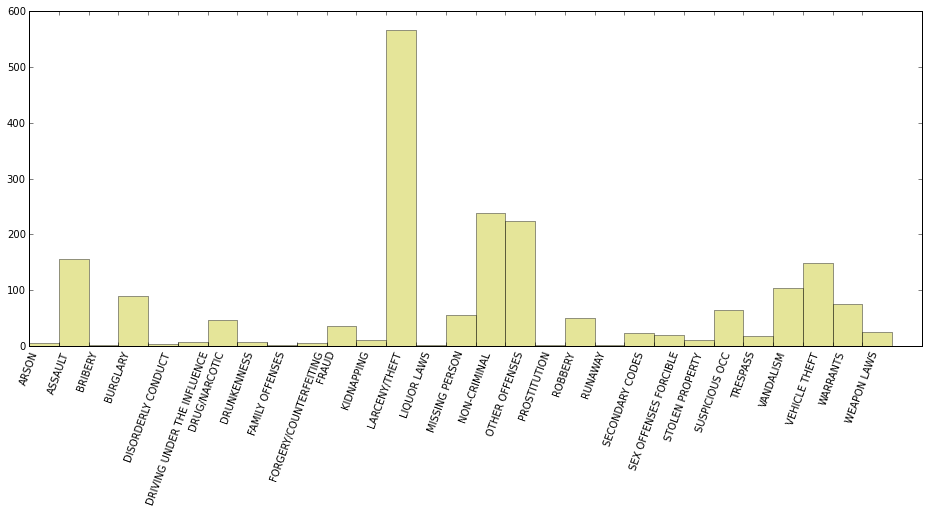

In [64]:
graph_bars(df.Category[:2000]).show()

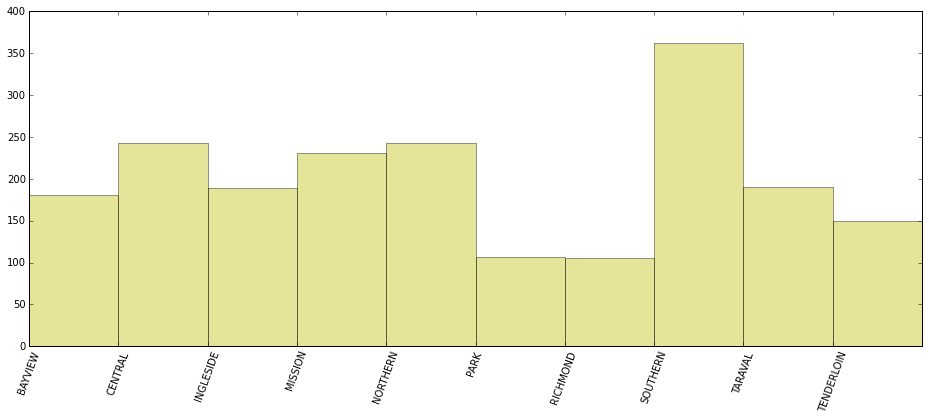

In [66]:
graph_bars(df.PdDistrict[:2000]).show()

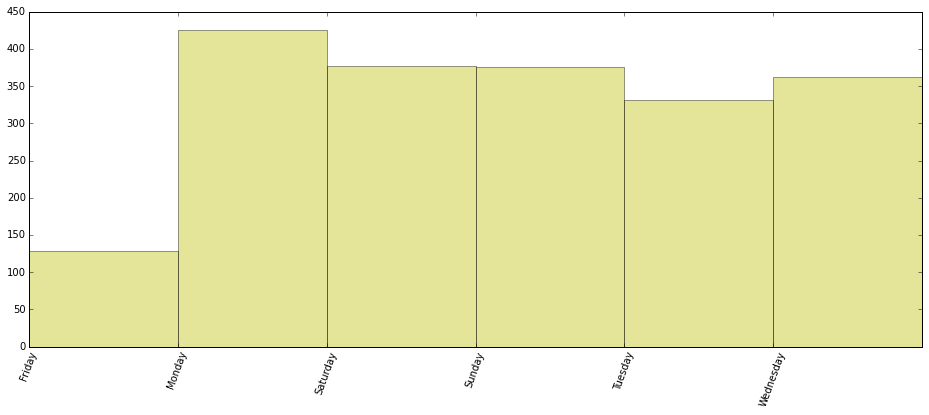

In [67]:
graph_bars(df.DayOfWeek[:2000]).show()